<a href="https://colab.research.google.com/github/AllaRudenkoGit/MyStudying/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [216]:
data=pd.read_csv('/content/sample_data/Titanic-Dataset.xls')

In [217]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
data.size

10692

In [220]:
data.drop(['Name','Ticket','PassengerId'],axis = 1, inplace = True)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [222]:
data.size

8019

In [223]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [201]:
from sklearn.preprocessing import LabelEncoder
labelsToEncode=['Cabin','Embarked','Sex']
for label in labelsToEncode:
  le=LabelEncoder()
  data[label] = le.fit_transform(data[label])

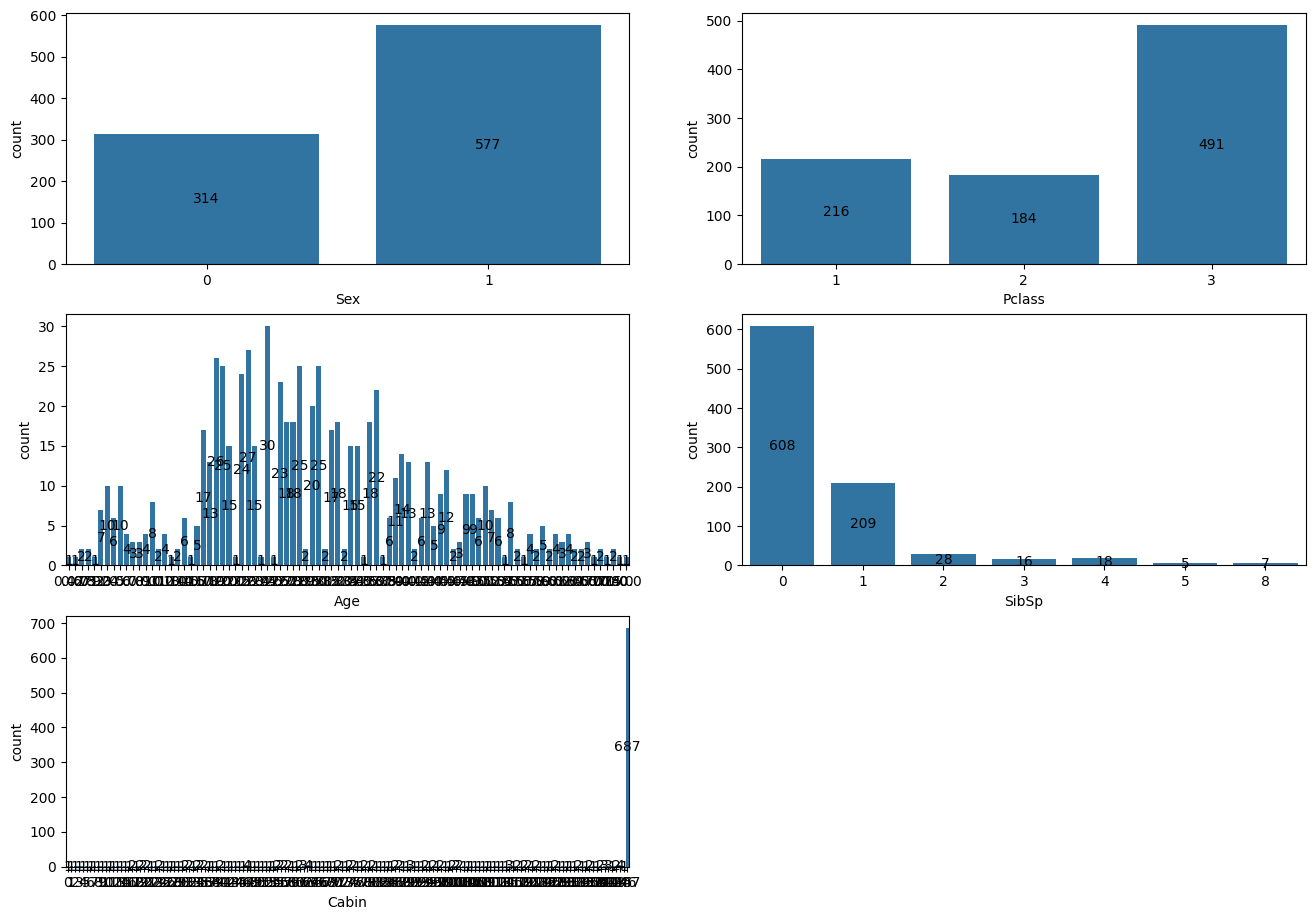

In [202]:
cols=["Sex","Pclass","Age","SibSp","Cabin"]

fig=plt.figure(figsize=(16,15))
for idx,col in enumerate(cols):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=data[col],ax=ax)
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

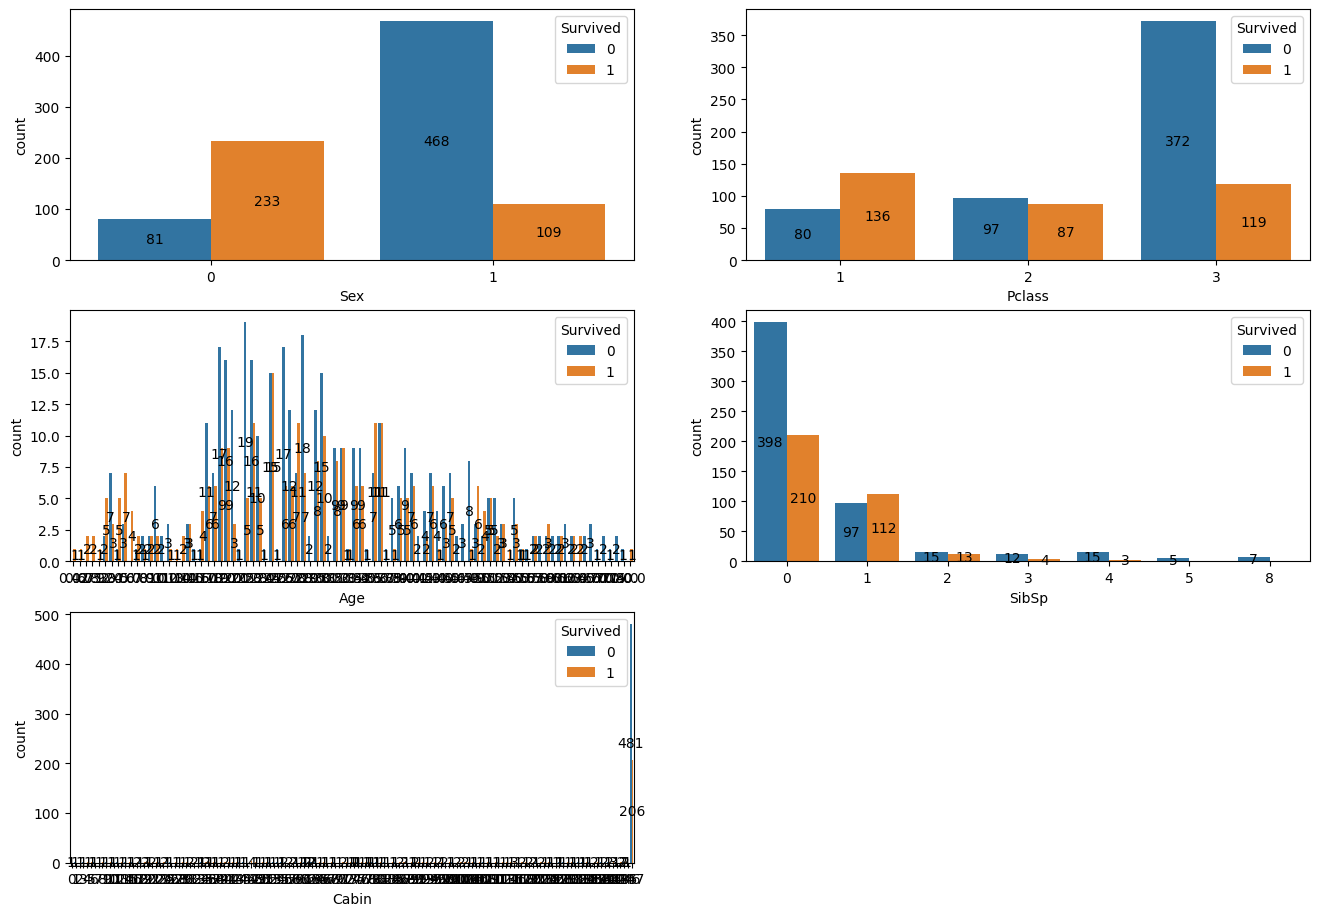

In [203]:
fig=plt.figure(figsize=(16,15))

for idx,col in enumerate(cols):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=data[col],ax=ax,hue=data['Survived'])
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

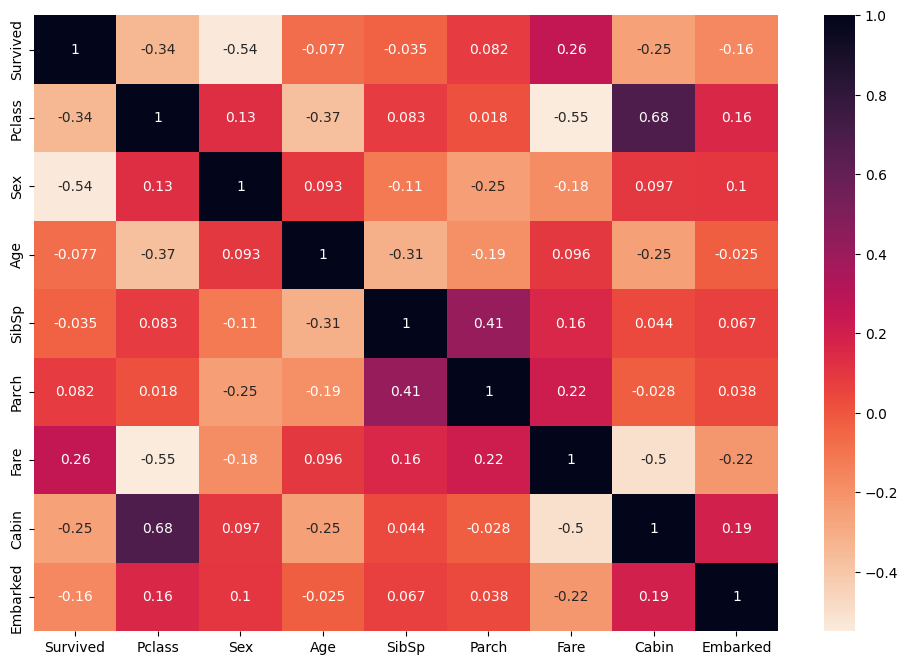

In [204]:
correlations=(data.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations,annot=True,cmap="rocket_r")
plt.show()

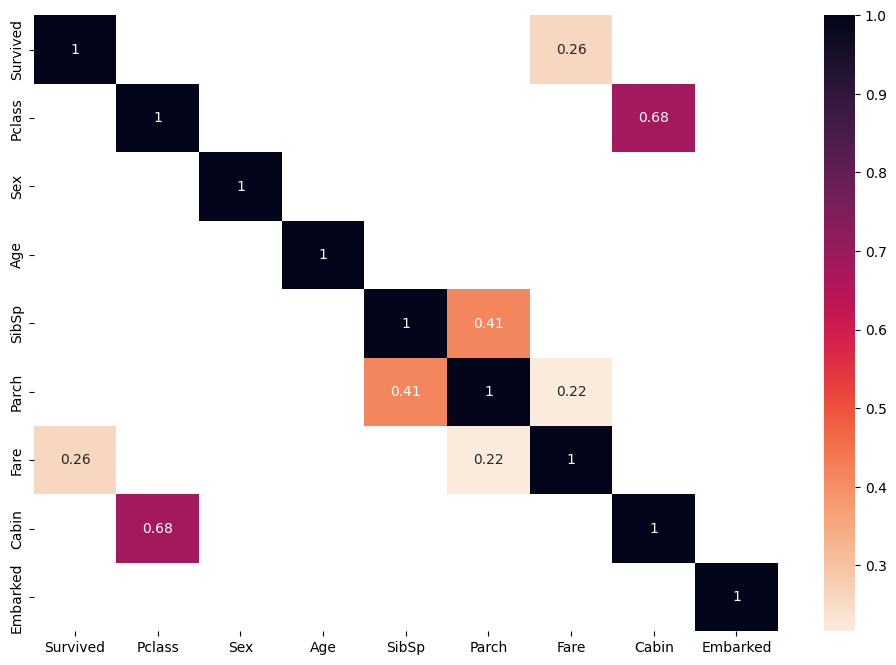

In [205]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations>0.2],annot=True,cmap="rocket_r")
plt.show()

In [206]:
px.imshow(data.corr(),title="Корреляционная матрица")

In [207]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,147,2
887,1,1,0,19.0,0,0,30.0000,30,2
888,0,3,0,NaN,1,2,23.4500,147,2
889,1,1,1,26.0,0,0,30.0000,60,0


In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [209]:
from sklearn.model_selection import train_test_split
X = data.drop(['Survived'],axis=1)
Y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=44)

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier

In [224]:
data.drop(['Age','Cabin','Embarked'],axis=1,inplace=True)

In [225]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [228]:
regr=RandomForestRegressor (max_depth=10,random_state=2)
regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, random_state=2)

In [229]:
pred2 = regr.predict(X_test)

In [234]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
117,2,1,29.0,1,0,21.0000,147,2
143,3,1,19.0,0,0,6.7500,147,1
748,1,1,19.0,1,0,53.1000,100,2
796,1,0,49.0,0,0,25.9292,94,2
853,1,0,16.0,0,1,39.4000,99,2
...,...,...,...,...,...,...,...,...
82,3,0,NaN,0,0,7.7875,147,1
185,1,1,NaN,0,0,50.0000,9,2
157,3,1,30.0,0,0,8.0500,147,2
486,1,0,35.0,1,0,90.0000,87,2


In [236]:
pred2

array([2.27699489e-02, 2.62383410e-01, 6.31576190e-01, 9.70000000e-01,
       1.00000000e+00, 2.10537241e-01, 9.70000000e-01, 0.00000000e+00,
       6.99521188e-02, 7.84642857e-01, 1.53194252e-01, 1.33843906e-02,
       5.03149912e-01, 4.74857143e-01, 7.55820168e-01, 1.99210739e-01,
       1.42281191e-01, 8.29880900e-01, 9.90000000e-01, 1.20482432e-01,
       6.22034119e-02, 1.86170197e-01, 9.80000000e-01, 5.48333333e-01,
       3.82857143e-01, 1.96805001e-01, 5.90000000e-01, 9.20196516e-02,
       1.00000000e+00, 8.06071429e-01, 9.80000000e-01, 9.90000000e-01,
       9.90000000e-01, 1.25603032e-02, 3.65275743e-02, 1.00000000e+00,
       4.15275743e-02, 1.00000000e+00, 1.90945909e-02, 9.70000000e-01,
       4.70854301e-01, 4.38888889e-01, 1.00000000e-01, 5.50000000e-02,
       2.05318935e-02, 8.04742731e-02, 2.53500263e-01, 2.01995678e-02,
       7.06083333e-01, 2.39079347e-01, 8.47494399e-01, 1.40365377e-01,
       1.03589286e-01, 4.67264596e-01, 9.60000000e-01, 1.56935113e-01,
      

In [237]:
Y_test

,Survived
117,0
143,0
748,0
796,1
853,1
...,...
82,1
185,0
157,0
486,1


In [230]:
mean_squared_error(Y_test,pred2)

0.16742270157012532

In [231]:
mean_absolute_percentage_error(Y_test,pred2)

705056715861512.1

In [233]:
LassoReg = LassoCV(cv=5,random_state=0).fit(X_train,Y_train)

ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [241]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [244]:
from google.collab import drive
drive.mount('/content/sample_data')

ModuleNotFoundError: No module named 'google.collab'

# Добро пожаловать в Colab!

## Изучите Gemini API
Gemini API дает доступ к моделям Gemini от Google DeepMind. Возможности этих мультимодальных моделей позволяют легко обрабатывать текст, изображения, код и аудио.

**Начало работы**
*  Перейдите в <a href="https://aistudio.google.com/">Google AI Studio</a> и выполните вход в аккаунт Google.
*  Создайте <a href="https://aistudio.google.com/app/apikey">ключ API</a>.
* Прочтите краткое руководство по <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> или вызовите REST API, используя <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Возможности Gemini**
*  Благодаря <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">мультимодальному выводу данных</a> Gemini может давать ответы то в виде текста, то в формате изображений.
*  Познакомьтесь с <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">мультимодальным Live API</a> &#40;демоверсия доступна <a href="https://aistudio.google.com/live">здесь</a>&#41;.
*  Узнайте, как с помощью Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">анализировать изображения и определять объекты на них</a>. Поддерживаются даже <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">трехмерные версии</a>.
*  Попробуйте возможности <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">рассуждающей модели Gemini</a>, которая решает сложные задачи на основании внутренних выводов.
      
**Примеры использования**
*  Создавайте отчеты о компаниях на основе данных из интернета, используя <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">функции обоснования Gemini</a>.
*  Извлекайте структурированные данные из <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">счетов и форм в формате PDF</a>.
*  Создавайте <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">иллюстрации на основе всего текста книги</a>. В этом вам поможет большое окно контекста Gemini и модель Imagen.

Дополнительные сведения можно найти в <a href="https://github.com/google-gemini/cookbook">справочном руководстве по Gemini</a> или <a href="https://ai.google.dev/docs/">документации к Gemini API</a>.


В Colab появились ИИ-функции на основе <a href="https://gemini.google.com">Gemini</a>. Чтобы узнать о них больше, посмотрите видео. Оно будет полезно как начинающим, так и опытным Python-разработчикам.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  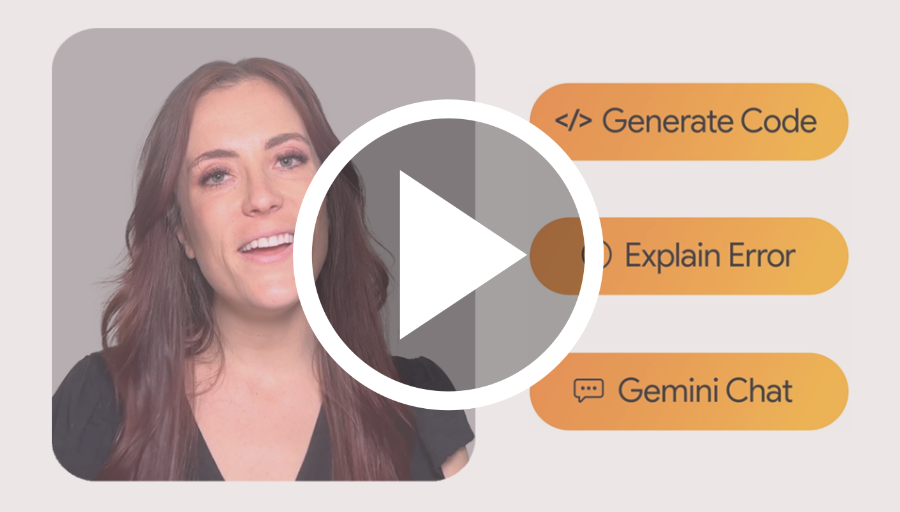
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Что такое Colab?</h2>
</div>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Colab – это отличное решение для <strong>учащихся</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите видео с <a href="https://www.youtube.com/watch?v=inN8seMm7UI">общей информацией о Colab</a> или <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">описанием функций сервиса</a>. Вы также можете просто начать работу с инструментом ниже.

<div class="markdown-google-sans">

## <strong>Начало работы</strong>
</div>

Документ, который вы читаете, размещен не на статической веб-странице, а в интерактивной среде под названием <strong>блокнот Colab</strong>, позволяющей писать и выполнять код.

Например, вот <strong>ячейка</strong> с коротким скриптом Python, который позволяет рассчитать значение, выразить его в виде переменной и распечатать результат:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Чтобы выполнить код в ячейке выше, выберите ее, а затем нажмите кнопку воспроизведения слева от кода или используйте сочетание клавиш Cmd/Ctrl + Ввод. Чтобы изменить код, достаточно нажать на ячейку.

Переменные, заданные в одной ячейке, можно будет использовать в других ячейках:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Благодаря блокнотам Colab вы можете использовать в одном документе <strong>исполняемый код</strong>, <strong>форматированный текст</strong>, <strong>изображения</strong>, <strong>разметку HTML</strong>, <strong>набор LaTeX</strong> и не только. Блокноты Colab будут храниться на вашем Google Диске. Вы сможете открыть к ним доступ коллегам или друзьям, разрешив им просматривать или даже редактировать документ, а также оставлять комментарии. Подробная информация доступна на <a href="/notebooks/basic_features_overview.ipynb">этой странице</a>. Чтобы создать блокнот Colab, можно воспользоваться меню "Файл" выше или <a href="http://colab.research.google.com#create=true">перейти по этой ссылке</a>.

Блокноты Colab – это блокноты Jupyter, которые размещены в сервисе Colab. Подробная информация о проекте Jupyter доступна на сайте <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Анализ и обработка данных
</div>

Colab позволяет использовать для анализа и визуализации данных все возможности популярных библиотек Python. Например, в ячейке ниже используется библиотека <strong>numpy</strong> для генерации случайных данных, а также библиотека <strong>matplotlib</strong> для их визуализации. Чтобы изменить код, достаточно нажать на ячейку.

Вы можете импортировать в блокноты Colab данные из своего аккаунта Google Диска, в том числе из таблиц, а также из GitHub и многих других источников. Чтобы узнать больше об импорте данных и о том, как можно использовать Colab для их анализа и обработки, изучите ссылки в разделе <a href="#working-with-data">Работа с данными</a>.

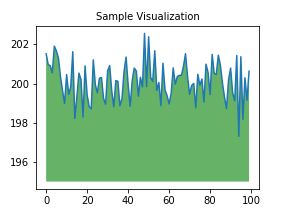

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Код в блокнотах Colab выполняется на облачных серверах Google. Это означает, что вы можете использовать возможности устройств Google, в том числе <a href="#using-accelerated-hardware">графических процессоров и TPU</a>, независимо от мощности вашей машины. Вам нужен только браузер.

Например, если вы хотите ускорить работу <strong>pandas</strong>, не меняя код, то можете переключиться на среду выполнения графического процессора и использовать такие библиотеки, как <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a>.

Узнать больше об ускорении pandas в Colab вам поможет <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-минутное руководство</a> и <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">эксперимент с анализом данных фондового рынка США</a>.

<div class="markdown-google-sans">

## Машинное обучение
</div>

В Colab вы можете импортировать набор данных изображения, сориентировать на него классификатор изображений и оценить модель с помощью <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">нескольких строк кода</a>.

Colab активно используется в области машинного обучения, в том числе для:
- знакомства с TensorFlow;
- разработки и обучения нейронных сетей;
- экспериментов с TPU;
- распространения исследований в области ИИ;
- создания руководств.

Примеры использования блокнотов Colab в сфере машинного обучения приведены в разделе <a href="#machine-learning-examples">Примеры использования в машинном обучении</a> ниже.

<div class="markdown-google-sans">

## Ресурсы по теме

### Работа с блокнотами в Colab

</div>

- [Кратко о Colab](/notebooks/basic_features_overview.ipynb)
- [Руководство для Markdown](/notebooks/markdown_guide.ipynb)
- [Импорт библиотек и установка зависимостей](/notebooks/snippets/importing_libraries.ipynb)
- [Сохранение и загрузка блокнотов в GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Интерактивные формы](/notebooks/forms.ipynb)
- [Интерактивные виджеты](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Работа с данными
</div>

- [Загрузка данных: Диск, Таблицы и Google Cloud Storage](/notebooks/io.ipynb)
- [Диаграмма: визуализация данных](/notebooks/charts.ipynb)
- [Начало работы с BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Машинное обучение

<div>

Вот несколько блокнотов, связанных с машинным обучением, в том числе из онлайн-курса по машинному обучению от Google. Подробная информация доступна на <a href="https://developers.google.com/machine-learning/crash-course/">сайте курса</a>.
- [Знакомство с Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [RAPIDS cuDF для ускорения работы pandas](https://nvda.ws/rapids-cudf)
- [Руководство по началу работы с режимом ускорения в cuML](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Линейная регрессия в tf.keras с использованием синтетических данных](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Использование ускорителей
</div>

- [TensorFlow с графическими процессорами](/notebooks/gpu.ipynb)
- [TPU в Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Примеры

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Обучение классификатора изображений</a>. Используя предварительно обученный классификатор изображений, создайте модель Keras для распознавания цветов.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Классификация текста</a>. Разделите отзывы на сайте IMDb на <em>положительные</em> и <em>отрицательные</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Перенос стиля</a>. Используйте модель глубокого обучения, чтобы переносить стиль с одного изображения на другое.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Вопросно-ответный универсальный многоязычный кодировщик</a>. Используйте модель машинного обучения, чтобы отвечать на вопросы из набора данных SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Интерполяция видео.</a> Спрогнозируйте, что произошло между первым и последним кадрами видео.
